# Lab 8


In [ ]:
### jupyter notebook crashes when running any ML model, all code was done in google collab. 
### Google collab has different indentions, so if some code doesn't work it might be because of indentions

In [1]:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  12.0M      0 --:--:--  0:01:12 --:--:-- 8170k


In [2]:
#!gunzip SUSY.csv.gz

In [3]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Apr 18 13:25 sample_data/
-rw-r--r-- 1 root root 2.3G Apr 20 02:51 SUSY.csv


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [5]:
# load data
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [6]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [7]:
# data splitting (training and testing)

N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

Train_sig=Train_Sample[Train_Sample.signal==1]
Train_bkg=Train_Sample[Train_Sample.signal==0]

We can train the classifier as follow:

In [8]:
# training
Fisher.fit(X_Train,y_train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

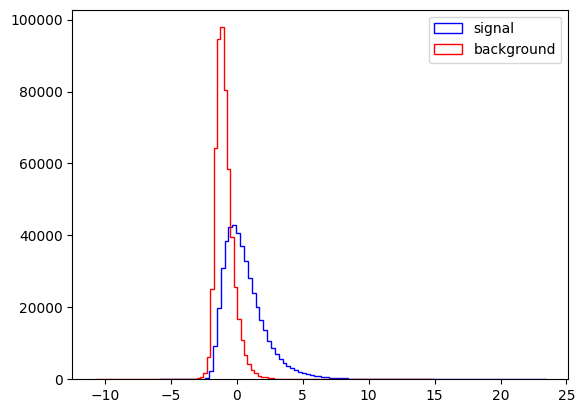

In [9]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


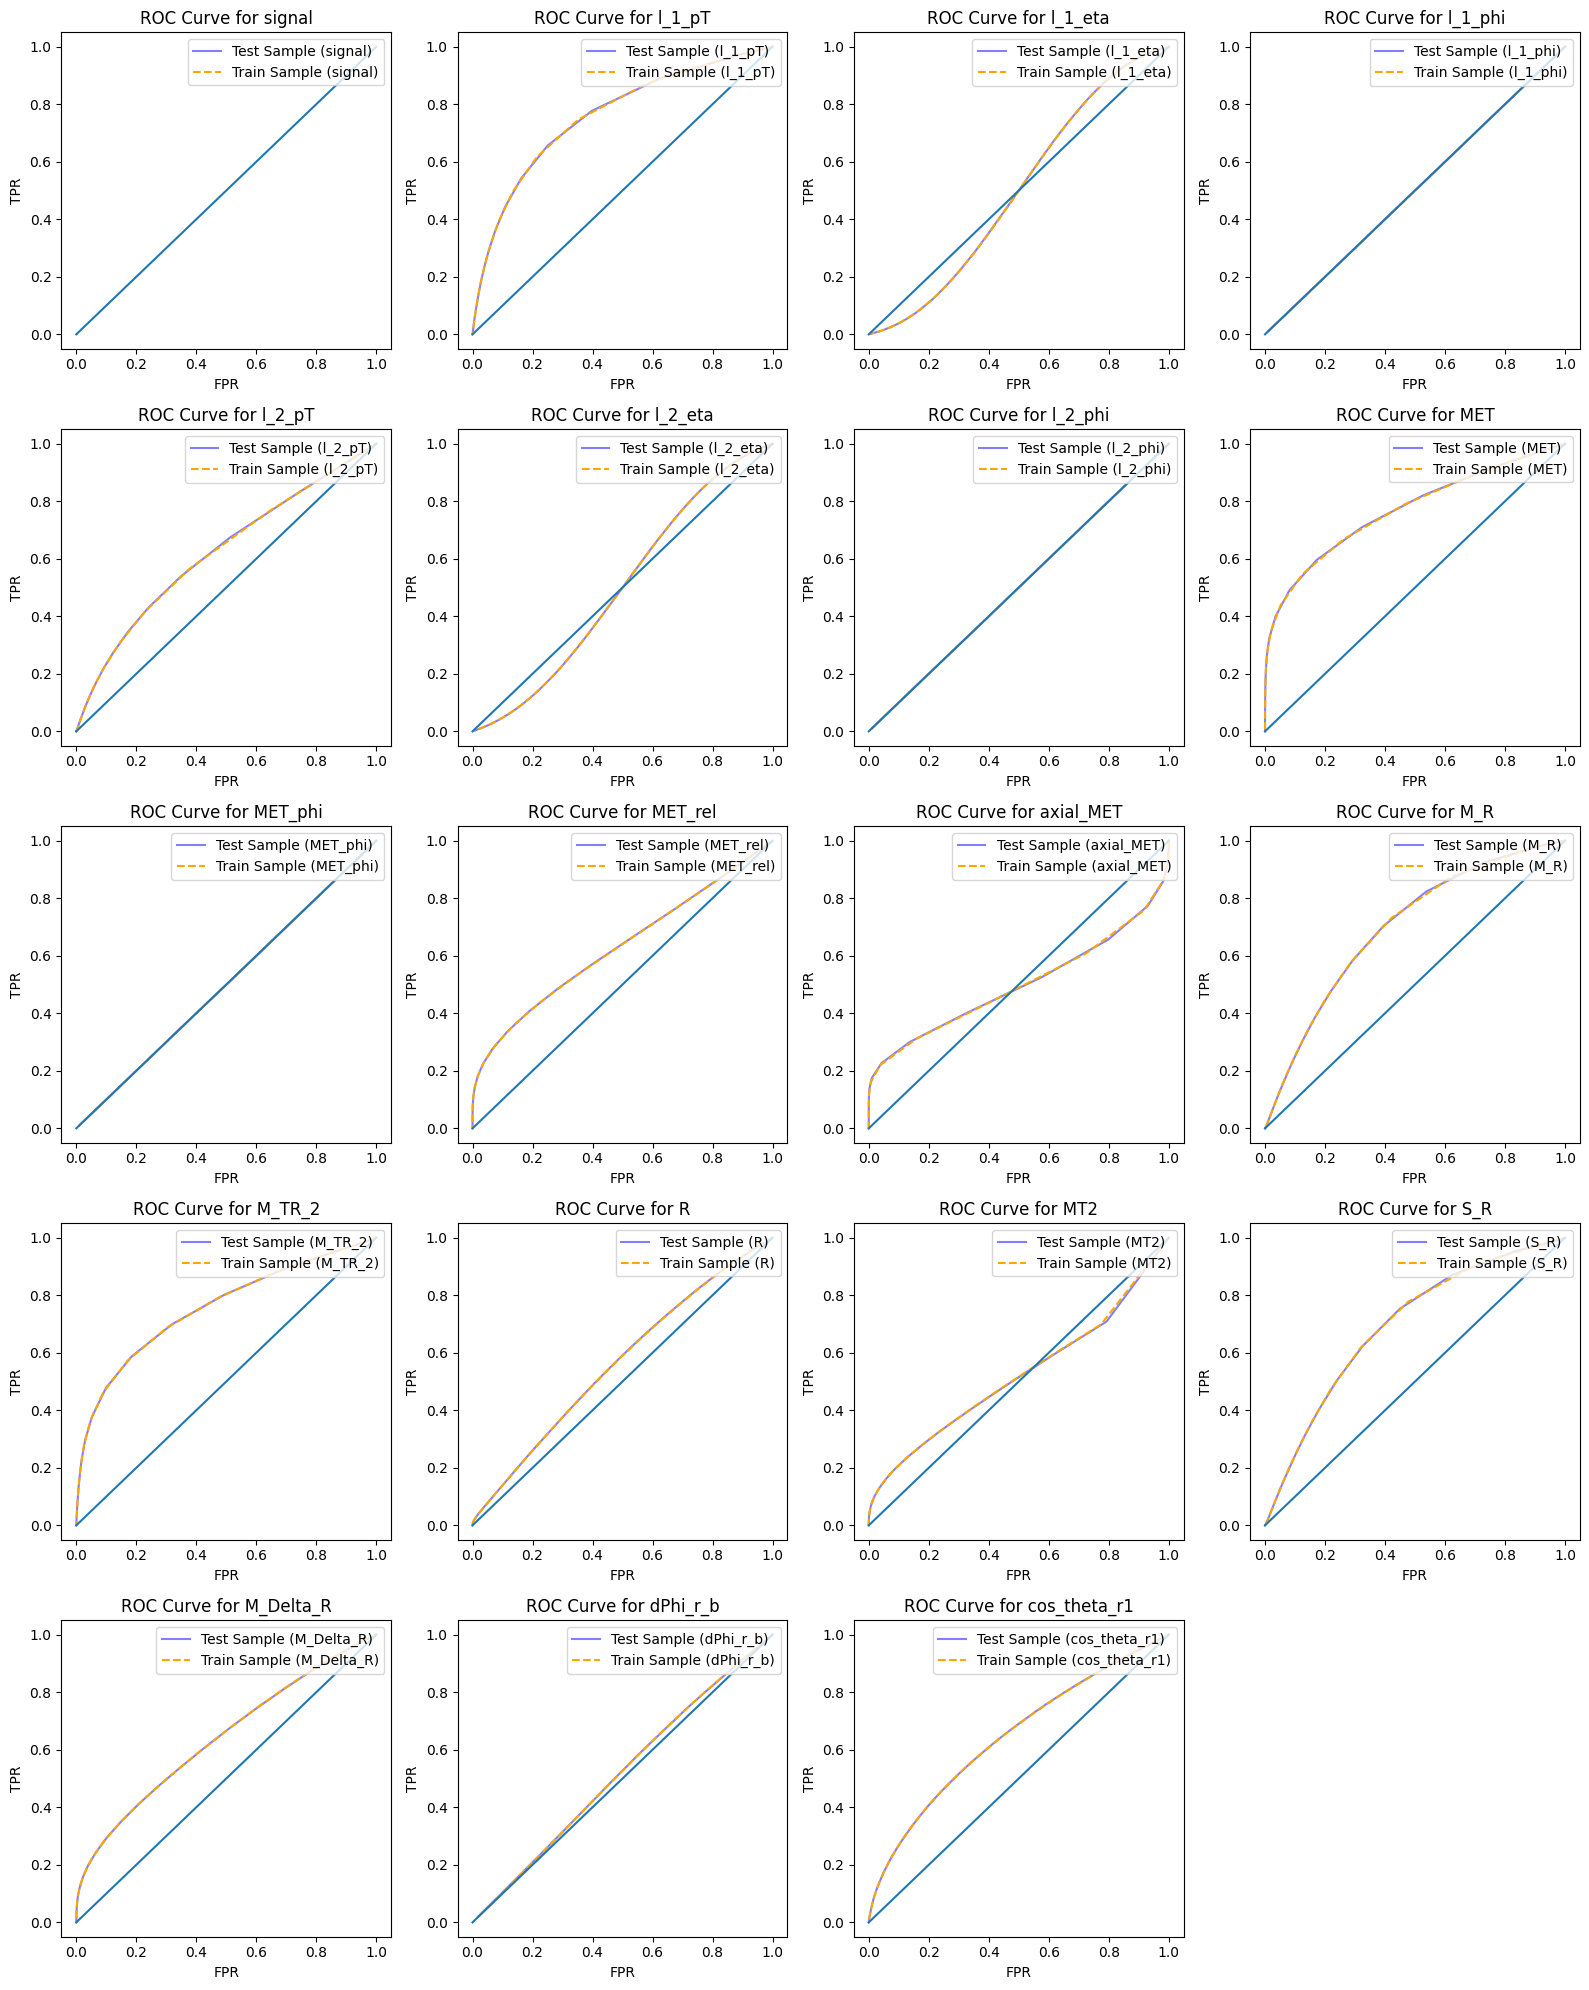

In [10]:
# part a

# compute TPR and FPR
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

plt.figure(figsize=(16, 20))
for i,var in enumerate(VarNames):

  ## test sample
  Test_TPR,bins=compute_rate(Test_sig[var])
  Test_FPR,bins=compute_rate(Test_bkg[var],bins=bins)

  ## train sample
  Train_TPR,bins=compute_rate(Train_sig[var])
  Train_FPR,bins=compute_rate(Train_bkg[var],bins=bins)

  # subpot
  plt.subplot(5,4,i+1)

  ## ROC --> FRP vs TRP

  # test sample
  plt.plot(Test_FPR,Test_TPR,alpha=.5,label=f'Test Sample ({var})',color="blue")

  # train sample
  plt.plot(Train_FPR,Train_TPR,label=f'Train Sample ({var})',color="orange", linestyle='--')

  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.plot([0,1],[0,1])
  plt.legend(loc="upper right")
  plt.title(f'ROC Curve for {var}')

plt.tight_layout()
plt.show()

In [11]:
# yes there is a bias, overfitting

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance on a single plot.

<ipython-input-12-f811050bccde>:19: RuntimeWarning: divide by zero encountered in divide
  fisher_scores = np.abs(class_means[0] - class_means[1]) / (class_vars[0] + class_vars[1])


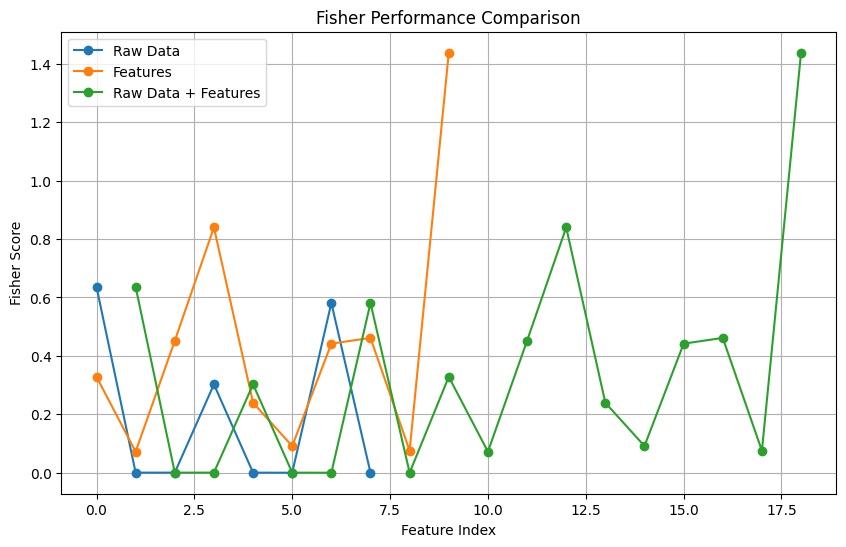

In [12]:
# part b

raw=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
feature=["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
x_raw = df[raw].values
X_raw=x_raw[:4000000] # makes df same length as other features and trainning data
X_feature = df[feature].values
X_features=X_feature[:4000000]
X_combine = df[VarNames].values
X_combined=X_combine[:4000000]

# compute Fisher score function
def compute_fisher_score(X, y):
  class_means = np.mean(X[y == 1], axis=0), np.mean(X[y == 0], axis=0)
  class_vars = np.var(X[y == 1], axis=0), np.var(X[y == 0], axis=0)
  fisher_scores = np.abs(class_means[0] - class_means[1]) / (class_vars[0] + class_vars[1])
  return fisher_scores

# compute Fisher scores
fisher_scores_raw = compute_fisher_score(X_raw, y_train)
fisher_scores_features = compute_fisher_score(X_features, y_train)
fisher_scores_combined = compute_fisher_score(X_combined, y_train)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(fisher_scores_raw, label='Raw Data', marker='o')
plt.plot(fisher_scores_features, label='Features', marker='o')
plt.plot(fisher_scores_combined, label='Raw Data + Features', marker='o')

plt.xlabel('Feature Index')
plt.ylabel('Fisher Score')
plt.title('Fisher Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [13]:
# part a

### i. support vector machine
### ii. nearest neighbor
### iii. decision tree

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate classifiers
svm_classifier = SVC(kernel='linear')
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()

In [ ]:
# make og dataset smaller so its easier to run
!head -500000 SUSY.csv > SUSY-small.csv
small_df = pd.read_csv("SUSY-small.csv", dtype='float64', names=VarNames)

# split smaller dataset
### train: 80%, test: 20%
Train_Sample=small_df[100000:]
Test_Sample=small_df[:100000]
x_train=Train_Sample[VarNames[1:]]
y_train=Train_Sample["signal"]
X_raw=x_raw[:400000]
x_test=Test_Sample[VarNames[1:]]
y_test=Test_Sample["signal"]

In [ ]:
# part b

def compare_classifier_fisher_performance(classifier, X_raw, X_features, X_combined, y_train, raw_labels, feature_labels):
    # fit classifier using raw data
    classifier.fit(X_raw, y_train)
    raw_coefficients = classifier.coef_ if hasattr(classifier, 'coef_') else classifier.feature_importances_

    # fit classifier using features
    classifier.fit(X_features, y_train)
    feature_coefficients = classifier.coef_ if hasattr(classifier, 'coef_') else classifier.feature_importances_

    # fit classifier using combined raw data and features
    classifier.fit(X_combined, y_train)
    combined_coefficients = classifier.coef_ if hasattr(classifier, 'coef_') else classifier.feature_importances_

    # compute Fisher scores
    fisher_scores_raw = np.abs(raw_coefficients)
    fisher_scores_features = np.abs(feature_coefficients)
    fisher_scores_combined = np.abs(combined_coefficients)

    # plotting
    plt.figure(figsize=(10, 6))
    plt.plot(fisher_scores_raw, label='Raw Data', marker='o')
    plt.plot(fisher_scores_features, label='Features', marker='o')
    plt.plot(fisher_scores_combined, label='Raw Data + Features', marker='o')

    plt.xlabel('Feature Index')
    plt.ylabel('Fisher Score')
    plt.title('Fisher Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for SVM classifier
compare_classifier_fisher_performance(svm_classifier, X_raw, X_features, X_combined, y_train, raw_labels=raw, feature_labels=feature)

# Call the function for KNN classifier
compare_classifier_fisher_performance(knn_classifier, X_raw, X_features, X_combined, y_train, raw_labels=raw, feature_labels=feature)

# Call the function for Decision Tree classifier
compare_classifier_fisher_performance(dt_classifier, X_raw, X_features, X_combined, y_train, raw_labels=raw, feature_labels=feature)


In [ ]:
# part c

# training data
dt_classifier.fit(x_train,y_train)

# Make predictions on the test data
predictions = dt_classifier.predict(x_test)

# Compute the number of signal and background events
N_S = np.sum(predictions == 1)  # signal num
N_B = np.sum(predictions == 0)  # background num

# maximal significance
sigma_S = N_S / np.sqrt(N_S + N_B)

print("Maximal Significance (σ_S):", sigma_S)

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, Fisher.decision_function(x_test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [ ]:
# part b

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, \
                            precision_score, recall_score, f1_score, accuracy_score

# Define a function to compute all metrics
def compute_metrics(classifier, X_test, y_test):
    # Make predictions
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Compute TPR and FPR
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Compute ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)

    # Compute precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    # Compute precision, recall, and F1 score at threshold for maximum F1 score
    f1_max = 0
    threshold_max = 0
    for threshold in np.unique(y_prob):
        y_pred_thresh = (y_prob >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_thresh)
        if f1 > f1_max:
            f1_max = f1
            threshold_max = threshold
    precision_max = precision_score(y_test, (y_prob >= threshold_max).astype(int))
    recall_max = recall_score(y_test, (y_prob >= threshold_max).astype(int))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Compute maximal significance
    N_S = np.sum(y_pred == 1)  # Number of signal events
    N_B = np.sum(y_pred == 0)  # Number of background events
    sigma_S = N_S / np.sqrt(N_S + N_B)

    return {
        'TPR': tpr,
        'FPR': fpr,
        'ROC AUC': roc_auc,
        'Precision': precision_max,
        'Recall': recall_max,
        'F1 Score': f1_max,
        'Accuracy': accuracy,
        'Max Significance': sigma_S
    }

# Create a table to store results
results = {}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

print(tabulate(results_df, headers='keys', tablefmt='pretty'))
